<a href="https://colab.research.google.com/github/sandarnaing/tutorial/blob/main/tutorial_2_dataprofessor/cheminformatics_predicting_solubility_080124.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 29.4 MB/s eta 0:00:00


In [2]:
! wget https://raw.githubusercontent.com/dataprofessor/data/master/delaney.csv

--2024-01-08 12:21:31--  https://raw.githubusercontent.com/dataprofessor/data/master/delaney.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58889 (58K) [text/plain]
Saving to: ‘delaney.csv’

delaney.csv         100%[===================>]  57.51K  --.-KB/s    in 0.008s  

2024-01-08 12:21:32 (6.94 MB/s) - ‘delaney.csv’ saved [58889/58889]



In [3]:
import pandas as pd

sol = pd.read_csv('delaney.csv')
sol

,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES
0,"1,1,1,2-Tetrachloroethane",-2.180,-2.794,ClCC(Cl)(Cl)Cl
1,"1,1,1-Trichloroethane",-2.000,-2.232,CC(Cl)(Cl)Cl
2,"1,1,2,2-Tetrachloroethane",-1.740,-2.549,ClC(Cl)C(Cl)Cl
3,"1,1,2-Trichloroethane",-1.480,-1.961,ClCC(Cl)Cl
4,"1,1,2-Trichlorotrifluoroethane",-3.040,-3.077,FC(F)(Cl)C(F)(Cl)Cl
...,...,...,...,...
1139,vamidothion,1.144,-1.446,CNC(=O)C(C)SCCSP(=O)(OC)(OC)
1140,Vinclozolin,-4.925,-4.377,CC1(OC(=O)N(C1=O)c2cc(Cl)cc(Cl)c2)C=C
1141,Warfarin,-3.893,-3.913,CC(=O)CC(c1ccccc1)c3c(O)c2ccccc2oc3=O
1142,Xipamide,-3.790,-3.642,Cc1cccc(C)c1NC(=O)c2cc(c(Cl)cc2O)S(N)(=O)=O


In [4]:
sol.SMILES

0                                    ClCC(Cl)(Cl)Cl
1                                      CC(Cl)(Cl)Cl
2                                    ClC(Cl)C(Cl)Cl
3                                        ClCC(Cl)Cl
4                               FC(F)(Cl)C(F)(Cl)Cl
                           ...                     
1139                   CNC(=O)C(C)SCCSP(=O)(OC)(OC)
1140          CC1(OC(=O)N(C1=O)c2cc(Cl)cc(Cl)c2)C=C
1141         CC(=O)CC(c1ccccc1)c3c(O)c2ccccc2oc3=O 
1142    Cc1cccc(C)c1NC(=O)c2cc(c(Cl)cc2O)S(N)(=O)=O
1143                         CNC(=O)Oc1cc(C)cc(C)c1
Name: SMILES, Length: 1144, dtype: object

In [5]:
sol.SMILES[0]

'ClCC(Cl)(Cl)Cl'

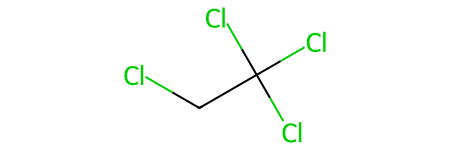

In [6]:
from rdkit import Chem
Chem.MolFromSmiles(sol.SMILES[0])

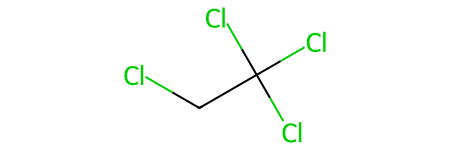

In [7]:
Chem.MolFromSmiles('ClCC(Cl)(Cl)Cl')

In [8]:
m = Chem.MolFromSmiles('ClCC(Cl)(Cl)Cl')
m.GetNumAtoms()

6

In [9]:
mol_list = []
for element in sol.SMILES:
  mol = Chem.MolFromSmiles(element)
  mol_list.append(mol)

In [10]:
len(mol_list)

1144

In [11]:
mol_list[:5]

In [12]:
mol_list2 = [Chem.MolFromSmiles(element) for element in sol.SMILES]
len(mol_list2)

1144

In [13]:
import numpy as np
from rdkit.Chem import Descriptors

def generate(smiles, verbose = False):
  moldata = []
  for elem in smiles:
    mol = Chem.MolFromSmiles(elem)
    moldata.append(mol)

  baseData = np.arange(1,1)
  i = 0
  for mol in moldata:
    desc_MolLogP = Descriptors.MolLogP(mol)
    desc_MolWt = Descriptors.MolWt(mol)
    desc_NumRotatableBonds = Descriptors.NumRotatableBonds(mol)
    row = np.array([desc_MolLogP,
                    desc_MolWt,
                    desc_NumRotatableBonds])
    if(i == 0):
      baseData = row
    else:
      baseData = np.vstack([baseData, row])
    i = i+1

  columnNames = ["MolLogP", "MolWt", "NumRotatableBonds"]
  descriptors = pd.DataFrame(data = baseData, columns = columnNames)

  return descriptors

In [14]:
df = generate(sol.SMILES)
df

,MolLogP,MolWt,NumRotatableBonds
0,2.59540,167.850,0.0
1,2.37650,133.405,0.0
2,2.59380,167.850,1.0
3,2.02890,133.405,1.0
4,2.91890,187.375,1.0
...,...,...,...
1139,1.98820,287.343,8.0
1140,3.42130,286.114,2.0
1141,3.60960,308.333,4.0
1142,2.56214,354.815,3.0


In [19]:
m = Chem.MolFromSmiles('COc1cccc2cc(C(=O)NCCCCN3CCN(c4cccc5nccnc54)CC3)oc21')
aromatic_atoms = [m.GetAtomWithIdx(i).GetIsAromatic() for i in range(m.GetNumAtoms())]
aromatic_atoms

[False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True]

In [32]:
def AromaticAtoms(m):
  aromatic_atoms = [m.GetAtomWithIdx(i).GetIsAromatic() for i in range(m.GetNumAtoms())]
  aa_count = []
  for i in aromatic_atoms:
    if i == True:
      aa_count.append(1)
  sum_aa_count = sum(aa_count)
  return sum_aa_count

In [33]:
AromaticAtoms(m)

19

In [34]:
desc_AromaticAtoms = [AromaticAtoms(element) for element in mol_list]
desc_AromaticAtoms

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 0,
 6,
 0,
 0,
 0,
 0,
 6,
 6,
 0,
 6,
 6,
 6,
 6,
 6,
 0,
 6,
 6,
 0,
 0,
 6,
 10,
 6,
 6,
 0,
 6,
 6,
 6,
 6,
 10,
 6,
 0,
 10,
 0,
 14,
 0,
 0,
 14,
 0,
 0,
 0,
 0,
 10,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 10,
 0,
 0,
 0,
 0,
 0,
 10,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 10,
 0,
 0,
 12,
 10,
 14,
 6,
 10,
 10,
 10,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 0,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 0,
 12,
 12,
 12,
 12,
 0,
 0,
 12,
 0,
 0,
 0,
 0,
 0,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 6,
 6,
 12,
 12,
 6,
 0,
 6,
 12,
 6,
 6,
 6,
 6,
 0,
 0,
 10,
 0,
 6,
 12,
 12,
 6,
 12,
 6,
 6,
 6,
 6,
 0,
 0,
 0,
 0,
 6,
 6,
 6,
 12,
 12,
 6,
 10,
 6,
 6,
 6,
 12,
 10,
 14,
 10,
 10,
 0,
 6,
 0,
 0,
 0,
 0,
 6,
 12,
 0,
 10,
 6,
 0,
 6,
 0,
 0,
 6,
 0,
 0,
 0,
 0,
 0,
 10,
 6,
 0,
 0,
 0,
 0,
 10,
 6,
 0,
 6,
 10,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 14,
 0,

In [36]:
df_desc_AromaticProportion = pd.DataFrame(desc_AromaticAtoms, columns = ['AromaticProportion'])
df_desc_AromaticProportion

,AromaticProportion
0,0
1,0
2,0
3,0
4,0
...,...
1139,0
1140,6
1141,16
1142,12


In [37]:
X = pd.concat([df,df_desc_AromaticProportion], axis = 1)
X

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0
1,2.37650,133.405,0.0,0
2,2.59380,167.850,1.0,0
3,2.02890,133.405,1.0,0
4,2.91890,187.375,1.0,0
...,...,...,...,...
1139,1.98820,287.343,8.0,0
1140,3.42130,286.114,2.0,6
1141,3.60960,308.333,4.0,16
1142,2.56214,354.815,3.0,12


In [38]:
sol.head()

,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES
0,"1,1,1,2-Tetrachloroethane",-2.18,-2.794,ClCC(Cl)(Cl)Cl
1,"1,1,1-Trichloroethane",-2.00,-2.232,CC(Cl)(Cl)Cl
2,"1,1,2,2-Tetrachloroethane",-1.74,-2.549,ClC(Cl)C(Cl)Cl
3,"1,1,2-Trichloroethane",-1.48,-1.961,ClCC(Cl)Cl
4,"1,1,2-Trichlorotrifluoroethane",-3.04,-3.077,FC(F)(Cl)C(F)(Cl)Cl


In [40]:
Y = sol.iloc[:,1]
Y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: measured log(solubility:mol/L), Length: 1144, dtype: float64

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [44]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [45]:
model = linear_model.LinearRegression ()
model.fit(X_train, Y_train)

LinearRegression()

In [46]:
Y_pred_train = model.predict(X_train)

In [48]:
print('Coefficient', model.coef_)
print('Intercept', model.intercept_)
print('Mean squared error (MSE): %.2f'
        % mean_squared_error(Y_train, Y_pred_train))
print('Coefficient of determination (R^2): %.2f'
        % r2_score(Y_train, Y_pred_train))

Coefficient [-0.72102343 -0.00556561 -0.00422771 -0.05240685]
Intercept 0.14806998002261862
Mean squared error (MSE): 0.98
Coefficient of determination (R^2): 0.77


In [49]:
Y_pred_test = model.predict(X_test)

In [53]:
print('Coefficient', model.coef_)
print('Intercept', model.intercept_)
print('Mean squared error (MSE): %.2f'
        % mean_squared_error(Y_test, Y_pred_test))
print('Coefficient of determination (R^2): %.2f'
        % r2_score(Y_test, Y_pred_test))

Coefficient [-0.72102343 -0.00556561 -0.00422771 -0.05240685]
Intercept 0.14806998002261862
Mean squared error (MSE): 1.03
Coefficient of determination (R^2): 0.78


In [63]:
print('LogS = %.2f %.2f LogP %.4f MW %.4f RB %.2f AP' % (model.intercept_, model.coef_[0], model.coef_[1], model.coef_[2], model.coef_[3]))

LogS = 0.15 -0.72 LogP -0.0056 MW -0.0042 RB -0.05 AP


In [64]:
fullDataset = linear_model.LinearRegression()
fullDataset.fit(X,Y)

LinearRegression()

In [65]:
fullDataset_pred = model.predict(X)

In [66]:
print('Coefficient', fullDataset.coef_)
print('Intercept', fullDataset.intercept_)
print('Mean squared error (MSE): %.2f'
        % mean_squared_error(Y, fullDataset_pred))
print('Coefficient of determination (R^2): %.2f'
        % r2_score(Y, fullDataset_pred))

Coefficient [-0.72467189 -0.00596976 -0.00076994 -0.04467196]
Intercept 0.17313979031725468
Mean squared error (MSE): 0.99
Coefficient of determination (R^2): 0.77


In [67]:
print('LogS = %.2f %.2f LogP %.4f MW %.4f RB %.2f AP' % (fullDataset.intercept_, fullDataset.coef_[0], fullDataset.coef_[1], fullDataset.coef_[2], fullDataset.coef_[3]))

LogS = 0.17 -0.72 LogP -0.0060 MW -0.0008 RB -0.04 AP


In [68]:
import matplotlib.pyplot as plt

In [69]:
Y_train.shape, Y_pred_train.shape

((915,), (915,))

In [70]:
Y_test.shape, Y_pred_test.shape

((229,), (229,))

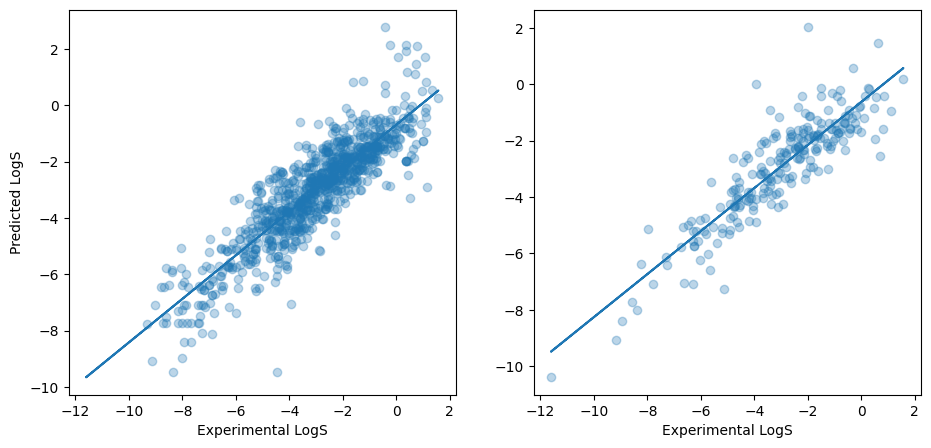

In [71]:
plt.figure(figsize = (11,5))
plt.subplot(1,2,1)
plt.scatter(x = Y_train, y = Y_pred_train, alpha = 0.3)

z = np.polyfit (Y_train, Y_pred_train, 1)
p = np.poly1d(z)
plt.plot(Y_test, p(Y_test))

plt.ylabel('Predicted LogS')
plt.xlabel('Experimental LogS')

plt.subplot(1,2,2)
plt.scatter(x = Y_test, y = Y_pred_test, alpha = 0.3)

z = np.polyfit (Y_test, Y_pred_test, 1)
p = np.poly1d(z)
plt.plot(Y_test, p(Y_test))

plt.xlabel('Experimental LogS')
plt.show()